<a href="https://colab.research.google.com/github/JUNYA-727/Tensorflow_study/blob/main/tensorflow3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer learning

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                  include_top = False, 
                                  weights = None)
#HDF5ファイル形式を読み込む
pre_trained_model.load_weights(local_weights_file)

#pre_trained_model.summary()
for i in pre_trained_model.layers:
  #freeze
  i.trainable=False
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
#last_layerを出力テンソルとして返す
last_output=last_layer.output


from tensorflow.keras.optimizers import RMSprop
x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
#過学習を防ぐためにドロップアウトの追加
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(pre_trained_model.input,x)
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentoropy',
              metrics=['accuracy'])

last layer output shape:  (None, 7, 7, 768)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs') 
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 71.1MB/s]
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 38s - loss: 0.3472 - accuracy: 0.8630 - val_loss: 0.2285 - val_accuracy: 0.9160
Epoch 2/20
100/100 - 18s - loss: 0.2399 - accuracy: 0.9055 - val_loss: 0.1447 - val_accuracy: 0.9480
Epoch 3/20
100/100 - 18s - loss: 0.2002 - accuracy: 0.9205 - val_loss: 0.1004 - val_accuracy: 0.9630
Epoch 4/20
100/100 - 18s - loss: 0.1822 - accuracy: 0.9345 - val_loss: 0.1165 - val_accuracy: 0.9530
Epoch 5/20
100/100 - 18s - loss: 0.2034 - accuracy: 0.9345 - val_loss: 0.1573 - val_accuracy: 0.9530
Epoch 6/20
100/100 - 18s - loss: 0.1920 - accuracy: 0.9285 - val_loss: 0.1334 - val_accuracy: 0.9510
Epoch 7/20
100/100 - 18s - loss: 0.1605 - accuracy: 0.9460 - val_loss: 0.1139 - val_accuracy: 0.9690
Epoch 8/20
100/100 - 19s - loss: 0.1855 - accuracy: 0.9380 - val_loss: 0.1032 - val_accuracy: 0.9640
Epoch 9/20
100/100 - 18s - loss: 0.1583 - accuracy: 0.9390 - val_loss: 0.1050 - val_accuracy: 0.9660
Epoch 10/20
100/100 - 18s - loss: 0.1581 - accuracy: 0.9445 - val_loss: 0.1037 - val_accura

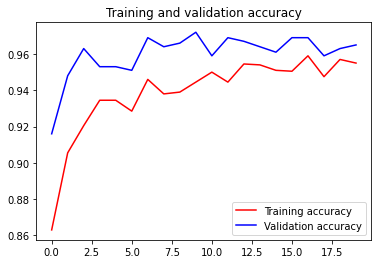

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()